<a href="https://colab.research.google.com/github/esperonj/Equipo26/blob/main/Avance1_26.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Maestría en Inteligencia Artificial Aplicada**
## Proyecto Integrador (Gpo 26)
> ### Tecnológico de Monterrey
>### Avance 1 - Análisis exploratorio de datos


## -

## **Automatización del Registro de Materiales Médicos mediante Visión Computacional**


### EQUIPO 26


* ### Luis Fernando Rojas Marta - A00757351
* ### Jose Eduardo Carreon - A01372413


### Librerias y direccion a archivos

In [2]:
### Agregar la unidad de Google Drive
from google.colab import drive
drive.mount("/content/gdrive")


Mounted at /content/gdrive


In [3]:
### Cambiar el directorio para el analisis de las fotos
%cd /content/gdrive/MyDrive/TEAM26_PROYECTO_INTEGRADOR/LABELS/

/content/gdrive/MyDrive/TEAM26_PROYECTO_INTEGRADOR/LABELS


In [4]:
### IMPORTACION DE LIBRERIAS

import os
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random


## Creacion y analisis del dataframe:

In [12]:
from google.colab import drive
drive.mount('/content/drive')
from google.colab import drive
drive.flush_and_unmount()
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Mounted at /content/gdrive


In [13]:
#Direccion a la carpeta con las etiquetas
carpeta_direccion = '/content/gdrive/MyDrive/TEAM26_PROYECTO_INTEGRADOR/LABELS/'

# Lista para almacenar informaciOn de cada imagen
info_imagen = []

#Ciclo para recorrer los archivos en la carpeta y obtener los valores
for archivo in os.listdir(carpeta_direccion):
    if archivo.lower().endswith('.jpg'):
        archivo_direccion = os.path.join(carpeta_direccion, archivo)
        try:
            with Image.open(archivo_direccion) as img:
                info_imagen.append({
                    'nombre': archivo,
                    'ancho': img.width,
                    'altura': img.height,
                    'modo': img.mode,
                    'formato': img.format,
                    'espacio_kb': os.path.getsize(archivo_direccion) / 1024
                })
        except Exception as e:
            print(f'Error con {archivo}: {e}')

#Creacion de un dataframe
dataframe = pd.DataFrame(info_imagen)

dataframe.head() #Mostramos solo los primeros 5

,nombre,ancho,altura,modo,formato,espacio_kb
0,IMG_5660.jpg,3024,4032,RGB,JPEG,2032.563477
1,IMG_5656.jpg,3024,4032,RGB,JPEG,2104.104492
2,IMG_5657.jpg,3024,4032,RGB,JPEG,2044.417969
3,IMG_5653.jpg,3024,4032,RGB,JPEG,2003.778320
4,IMG_5655.jpg,3024,4032,RGB,JPEG,2260.522461


#### Informacion basica del Dataframe:

In [14]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   nombre      61 non-null     object 
 1   ancho       61 non-null     int64  
 2   altura      61 non-null     int64  
 3   modo        61 non-null     object 
 4   formato     61 non-null     object 
 5   espacio_kb  61 non-null     float64
dtypes: float64(1), int64(2), object(3)
memory usage: 3.0+ KB


#### Estructura del dataframe de las columnas con valores numericos:

In [15]:
dataframe.describe().T

,count,mean,std,min,25%,50%,75%,max
ancho,61.0,3271.868852,437.667738,3024.000000,3024.000000,3024.000000,3024.000000,4032.000000
altura,61.0,3784.131148,437.667738,3024.000000,4032.000000,4032.000000,4032.000000,4032.000000
espacio_kb,61.0,2424.457928,493.176198,1540.318359,2080.118164,2358.898438,2565.236328,4076.088867


Tras este analisis se puede concluir como todas las imagenes son del mismo ancho y alto.

#### Informacion de las columnas no numericas:

In [16]:
print("Numero total de imagenes:", len(dataframe))
print("\nFormatos de imagenes:")
print(dataframe['formato'].value_counts())

print("\nModos de color:")
print(dataframe['modo'].value_counts())

Numero total de imagenes: 61

Formatos de imagenes:
formato
JPEG    61
Name: count, dtype: int64

Modos de color:
modo
RGB    61
Name: count, dtype: int64


##Grafica de Distribucion de tamaño:

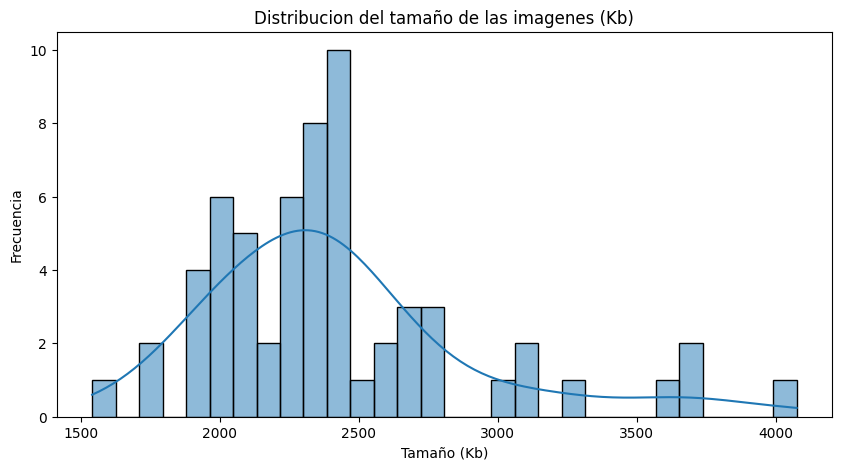

In [17]:
#Mostramos la distribucion de los tamaños de las imagenes

plt.figure(figsize=(10, 5))
sns.histplot(dataframe['espacio_kb'], bins=30, kde=True)
plt.title('Distribucion del tamaño de las imagenes (Kb)')
plt.xlabel('Tamaño (Kb)')
plt.ylabel('Frecuencia')
plt.show()

Con la grafica podemos encontrar que la mayoria de las imagenes tienen un tamaño de entre 2,000 Kb y 3,000 Kb.

## Visualizacion de imagenes:

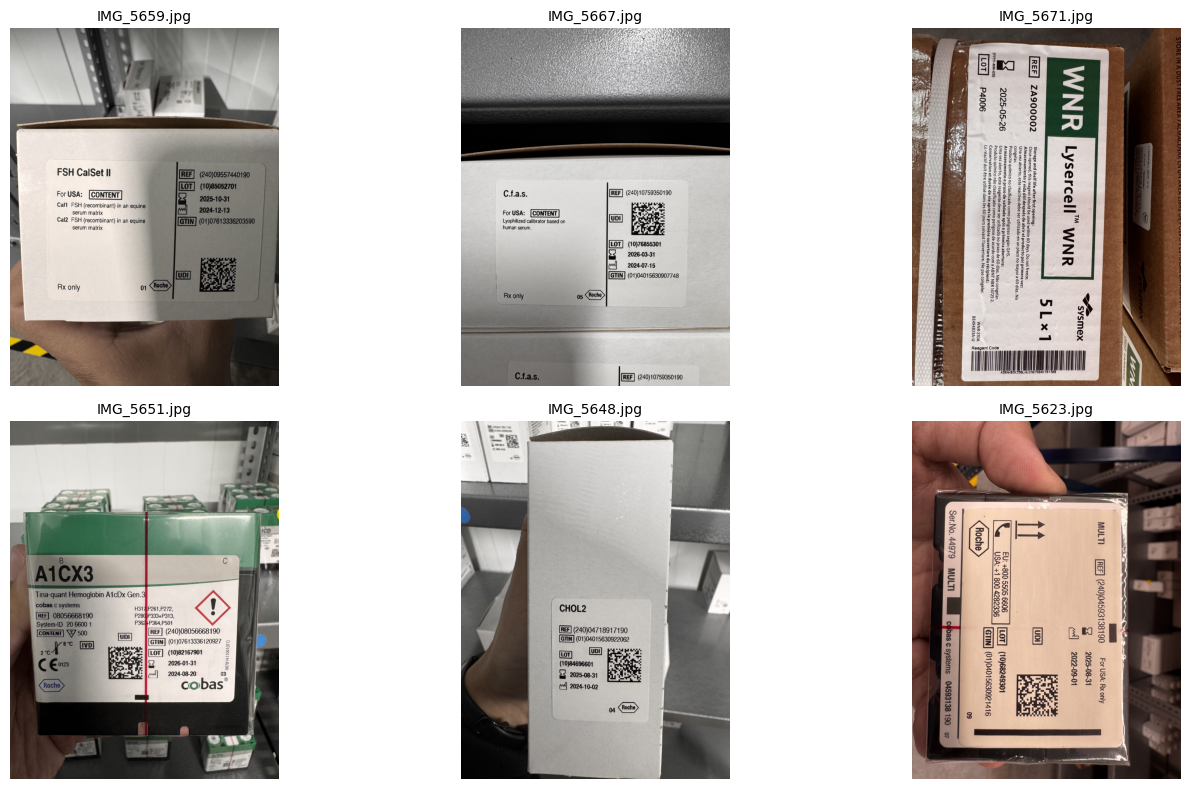

In [18]:
##Visualizacion de unas imagenes aleatorias

# Seleccionar aleatoriamente 6 imágenes
imagenes_muestra = dataframe.sample(6)['nombre'].tolist()

# Crear figura
plt.figure(figsize=(15, 8))

for i, nombre in enumerate(imagenes_muestra):
    foto_direccion = os.path.join(carpeta_direccion, nombre)
    img = Image.open(foto_direccion)

    plt.subplot(2, 3, i + 1)
    plt.imshow(img)
    plt.title(nombre, fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()

## ANALISIS DE ETIQUETAS

Dentro del proceso de almacenamiento de insumos para dispositivos médicos, muestran diversos etiquetados que provienen de su forma de fabricación. Se han identificado que los productos de mayor volumen son los relacionados a la marca cobas para insumos de Química clínica e Inmunología, así como los insumos de la marca Sysmex, que son insumos de la línea de Hematología.

De acuerdo al mercado de laboratorio clínico en México, estos insumos son los que tienen mayor demanda de volumen, entre un 60%-70%, por lo que estaríamos atendiendo la dificultad de leer un porcentaje similar en cuanto a tipos de productos de la empresa Diquilav.

La información mostrada en las etiquetas es variable. En revisiones de este tipo, encontramos que existen al menos 20 tipos de etiquetas distintas, de las mismas, no siempre viene la información necesaria, ya que depende del tipo de producto del que estamos hablando. La clasificación por tipo de material es el siguiente:

*   Reactivo
*   Calibrador
*   Consumible
*   Control
*   Equipo
*   Accesorio
*   Auxiliar

El porcentaje de los insumos que son reactivos son alrededor del 80%, y son los insumos que tienen mayor rotación dentro del inventario, es decir, sus datos de lote y fechas de caducidad son los que tienen mayor porcentaje de probabilidad de que cambien de un pedido a otro. Por ello es que solamente nos estamos enfocando en esas etiquetas. Algunas de ellas pertenecen a un miso tipo de equipamiento.

La cantidad de etiquetas distintas que hemos identificado como una muestra suficientemente buena para poder hacer los ejercicios iniciales son 7 tipo de etiquetas distintas, todas muestran en diferentes partes de la etiqueta la información de:

*   REFERENCIA: número de catálogo del fabricante que tiene relación con el material determinado, es único y relaciona la descripción del material, así como su presentación.
*   LOTE: es relacionado a un dato de fabricación, cada que una línea de producción es distinta, este número cambia.
*   CADUCIDAD: la relación que tiene con el número de LOTE es uno a uno, algunas fechas vienen con datos solamente de mes y año.

## Problemas de toma de imagen

Aunque en los ejemplos mostrados se encuentra una definición buena para cada uno de las etiquetas, algunos de estos son tomadas en diferentes partes del almacén. Algunos insumos, sobre todo los que parecen casetes, tienen un papel tipo celofán encima que pudiera reflejar el flash o la luz del exterior, lo que obstruye los datos de las imágenes tomadas.

También, es importante mencionar que la persona que recibe los materiales puede cambiar, lo que pudiera afectar la calidad y replicidad de la imagen para poder tomar en consideración los datos de la etiqueta tomados.

El control de la iluminación no debería ser un problema ya que al ser un espacio determinado para recibir materiales, la luz debe ser la misma la mayor cantidad de las veces o en la mayor cantidad de los casos.